In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ast
from collections import Counter

# Recipe Recommendation System
### Could it recommend a subtitle too?

## part 1 - Datasets and EDA

https://www.kaggle.com/datasets/elisaxxygao/foodrecsysv1

### 1.0 Recipes

In [5]:
recipes = pd.read_csv("MommysCookbookDS/data/foodRecSys-V1_kaggle/raw-data_recipe.csv")

In [6]:
recipes.shape

(49698, 9)

In [7]:
recipes.head(3)

,recipe_id,recipe_name,aver_rate,image_url,review_nums,ingredients,cooking_directions,nutritions,reviews
0,222388,Homemade Bacon,5.000000,https://images.media-allrecipes.com/userphotos...,3,pork belly^smoked paprika^kosher salt^ground b...,{'directions': u'Prep\n5 m\nCook\n2 h 45 m\nRe...,"{u'niacin': {u'hasCompleteData': False, u'name...","{8542392: {'rating': 5, 'followersCount': 11, ..."
1,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,https://images.media-allrecipes.com/userphotos...,29,sauerkraut drained^Granny Smith apples sliced^...,{'directions': u'Prep\n15 m\nCook\n2 h 30 m\nR...,"{u'niacin': {u'hasCompleteData': False, u'name...","{3574785: {'rating': 5, 'followersCount': 0, '..."
2,218939,Foolproof Rosemary Chicken Wings,4.571429,https://images.media-allrecipes.com/userphotos...,12,chicken wings^sprigs rosemary^head garlic^oliv...,"{'directions': u""Prep\n20 m\nCook\n40 m\nReady...","{u'niacin': {u'hasCompleteData': True, u'name'...","{13774946: {'rating': 5, 'followersCount': 0, ..."


In [8]:
recipes.dtypes

recipe_id               int64
recipe_name            object
aver_rate             float64
image_url              object
review_nums             int64
ingredients            object
cooking_directions     object
nutritions             object
reviews                object
dtype: object

In [11]:
recipes.reviews[0]

'{8542392: {\'rating\': 5, \'followersCount\': 11, \'madeRecipesCount\': 18, \'favoritesCount\': 200, \'dateLastModified\': u\'2017-04-22T12:46:43.663\', \'text\': u"Best breakfast ever! I ran out of paprika while seasoning, so I used garlic piercer on the other half of the batch. Very good! Can\'t wait to make it again... and figure out how to use the drippings!", \'followingCount\': 0}, 11174581: {\'rating\': 5, \'followersCount\': 8, \'madeRecipesCount\': 55, \'favoritesCount\': 101, \'dateLastModified\': u\'2013-06-20T15:50:25.96\', \'text\': u"Awesome!\\nIt\'s amazing.", \'followingCount\': 0}, 8262477: {\'rating\': 5, \'followersCount\': 0, \'madeRecipesCount\': 1, \'favoritesCount\': 52, \'dateLastModified\': u\'2015-02-14T07:27:51.307\', \'text\': u\'The flavors came together well and it really was simple to prepare. My husband and I both enjoyed it!\', \'followingCount\': 0}}\n'

In [65]:
recipes = recipes.drop(columns = ["image_url", "nutritions"])

In [82]:
recipes.ingredients = recipes.ingredients.str.split("^")

In [83]:
recipes.ingredients[0]

['sauerkraut drained',
 'Granny Smith apples sliced',
 'large onion',
 'caraway seeds',
 'apple cider divided',
 'brown sugar',
 'Rub:',
 'Thai seasoning',
 'salt',
 'garlic powder',
 'ground black pepper',
 'boneless pork loin roast']

In [66]:
recipes.cooking_directions = recipes.cooking_directions.apply(ast.literal_eval)

In [76]:
# Make sure there is only "directions" info
assert(recipes.cooking_directions.apply(lambda x: len(x.keys()) == 1).all())
assert(recipes.cooking_directions.apply(lambda x: list(x.keys())[0] == "directions").all())

In [77]:
# reduce to string
recipes.cooking_directions = recipes.cooking_directions.apply(lambda x: list(x.values())[0])

In [84]:
type(recipes.cooking_directions[0])

str

In [85]:
recipes[recipes.recipe_id == 6667]

,recipe_id,recipe_name,ingredients,cooking_directions
37572,6667,Cornish Splits,"[active dry yeast, lukewarm milk, white sugar,...","In a small bowl, dissolve the yeast in the mil..."


In [86]:
# pretty print recipe with matching image by id

In [89]:
# [item for row in matrix for item in row]

In [111]:
ingredients_flat = [ingredient for recipe in recipes.ingredients for ingredient in recipe]

In [112]:
ingredients_counter = Counter(ingredients_flat)

In [113]:
len(ingredients_counter)

34157

In [114]:
ingredients_counter.total()

415116

In [115]:
ingredients_counter.most_common(10)

[('salt', 13910),
 ('butter', 12354),
 ('white sugar', 12016),
 ('all-purpose flour', 9529),
 ('garlic', 7511),
 ('olive oil', 6909),
 ('water', 6892),
 ('vanilla extract', 5915),
 ('milk', 5811),
 ('eggs', 5359)]

In [116]:
ingredients_counter.most_common()[-20:]

[('lime sliced into rounds (optional)', 1),
 ('jalapeno-stuffed green olives', 1),
 ('fluid ounce) jiggers premium tequila', 1),
 ('fluid ounce) jigger orange liqueur', 1),
 ('fluid ounce) jigger sweetened lime juice', 1),
 ('fluid ounces beer (such as Miller® High Life®)', 1),
 ('fluid ounces cola-flavored carbonated beverage (such as Coca-Cola®)', 1),
 ('instant milk chocolate drink mix', 1),
 ('Meyer lemon juiced and peeled', 1),
 ('fluid ounces spiced rum (such as Kraken®)', 1),
 ('fluid ounce freshly squeezed orange juice', 1),
 ('fluid ounce freshly squeezed grapefruit juice', 1),
 ('fluid ounce white rum (such as Captain Morgan™)', 1),
 ("fluid ounce dark rum (such as Myers's®)", 1),
 ('fluid ounce hibiscus syrup', 1),
 ('fluid ounce almond orgeat syrup (such as Torani®)', 1),
 ('black beans drained and liquid reserved', 1),
 ('fluid ounces reduced calorie cranberry juice cocktail', 1),
 ('fluid ounces reduced calorie lemonade', 1),
 ('crushed jalapeno and habanero peanut brittl

measuring units, brands and preparation methods (squeezed) to be removed for accurate counting -> text processing instead of naive vectorization

from i don't remember which article mean(embedding_title, embedding_ingredients, embedding_directions)

In [117]:
top_20 = ingredients_counter.most_common(20)
most_common_keys = list(reversed([x[0] for x in top_20]))
most_common_counts = list(reversed([x[1] for x in top_20]))

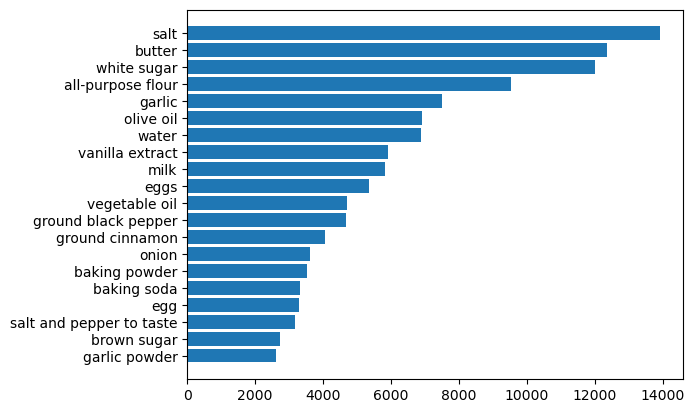

In [118]:
plt.barh(most_common_keys, most_common_counts)
plt.show()

### 2.0 Ratings

In [4]:
pd.read_csv("MommysCookbookDS/data/foodRecSys-V1_kaggle/raw-data_interaction.csv")

,user_id,recipe_id,rating,dateLastModified
0,8542392,222388,5,2017-04-22T12:46:43.663\n
1,11174581,222388,5,2013-06-20T15:50:25.96\n
2,8262477,222388,5,2015-02-14T07:27:51.307\n
3,3574785,240488,5,2017-10-07T18:20:08.973\n
4,12145410,240488,2,2018-01-06T00:06:09.563\n
...,...,...,...,...
3793998,12318233,170710,5,2013-11-03T11:09:47.763\n
3793999,51226,170710,5,2009-07-18T19:33:36.317\n
3794000,1476783,170710,5,2009-07-27T10:21:45.823\n
3794001,1245064,79774,4,2006-01-21T20:57:09.327\n
